In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import ast
from collections import Counter
from networkx.algorithms import community
from IPython.display import display

In [2]:
artist_w_genre = pd.read_csv('data/data_w_genres.csv')
artist_w_genre.head(5).T

,0,1,2,3,4
genres,['show tunes'],[],[],[],[]
artists,"""Cats"" 1981 Original London Cast","""Cats"" 1983 Broadway Cast","""Fiddler On The Roof” Motion Picture Chorus","""Fiddler On The Roof” Motion Picture Orchestra","""Joseph And The Amazing Technicolor Dreamcoat""..."
acousticness,0.590111,0.862538,0.856571,0.884926,0.510714
danceability,0.467222,0.441731,0.348286,0.425074,0.467143
duration_ms,250318.555556,287280.0,328920.0,262890.962963,270436.142857
energy,0.394003,0.406808,0.286571,0.24577,0.488286
instrumentalness,0.0114,0.081158,0.024593,0.073587,0.0094
liveness,0.290833,0.315215,0.325786,0.275481,0.195
loudness,-14.448,-10.69,-15.230714,-15.63937,-10.236714
speechiness,0.210389,0.176212,0.118514,0.1232,0.098543


In [3]:
# Convert the genre from obejct to list
def convert_genre_to_list(genre_list):
    global i
    try:
        if isinstance(genre_list, list):
            return genre_list
        
        parsed_list = ast.literal_eval(genre_list)
        
        if isinstance(parsed_list, list):
            return parsed_list
        else:
            cleaned_list = parsed_list.replace('[', '').replace(']', '')

            if cleaned_list.strip():
                genres = [g.strip() for g in cleaned_list.split(',')]
            else:
                genres = []
                
            return genres
    except (ValueError, SyntaxError) as e:
        print(f"Warning: Could not parse genre string: {genre_list}", i)
        print(f"Error: {e}")
        i += 1
        return []

In [4]:
# Apply the conversion function to the 'genres' column
i = 0
artist_w_genre['parsed_genres'] = artist_w_genre['genres'].apply(convert_genre_to_list)
artist_w_genre

,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,parsed_genres
0,['show tunes'],"""Cats"" 1981 Original London Cast",0.590111,0.467222,250318.555556,0.394003,0.011400,0.290833,-14.448000,0.210389,117.518111,0.389500,38.333333,5,1,9,[show tunes]
1,[],"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,30.576923,5,1,26,[]
2,[],"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.857143,0,1,7,[]
3,[],"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.851852,0,1,27,[]
4,[],"""Joseph And The Amazing Technicolor Dreamcoat""...",0.510714,0.467143,270436.142857,0.488286,0.009400,0.195000,-10.236714,0.098543,122.835857,0.482286,43.000000,5,1,7,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28675,[],麥志誠,0.512000,0.356000,198773.000000,0.306000,0.008970,0.108000,-10.119000,0.027700,150.049000,0.328000,35.000000,10,1,2,[]
28676,"['c-pop', 'classic cantopop', 'classic mandopo...",黃品源,0.541000,0.578000,293840.000000,0.334000,0.000006,0.067500,-11.974000,0.026700,135.934000,0.243000,48.000000,9,0,2,"[c-pop, classic cantopop, classic mandopop, ma..."
28677,[],黃國隆,0.785455,0.570818,174582.727273,0.148400,0.000083,0.142191,-21.610091,0.054355,119.586273,0.741273,23.000000,5,1,11,[]
28678,"['chinese indie', 'chinese indie rock']",黑豹,0.381000,0.353000,316160.000000,0.686000,0.000000,0.056800,-9.103000,0.039500,200.341000,0.352000,35.000000,11,1,2,"[chinese indie, chinese indie rock]"


In [5]:
# Filter the null values in the 'genres' column
filtered_df = artist_w_genre[artist_w_genre['genres'] != '[]'].copy()
filtered_df[(filtered_df['genres'] == '[]') | (filtered_df['genres'].isnull())]


,genres,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,parsed_genres


In [6]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18823 entries, 0 to 28679
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   genres            18823 non-null  object 
 1   artists           18823 non-null  object 
 2   acousticness      18823 non-null  float64
 3   danceability      18823 non-null  float64
 4   duration_ms       18823 non-null  float64
 5   energy            18823 non-null  float64
 6   instrumentalness  18823 non-null  float64
 7   liveness          18823 non-null  float64
 8   loudness          18823 non-null  float64
 9   speechiness       18823 non-null  float64
 10  tempo             18823 non-null  float64
 11  valence           18823 non-null  float64
 12  popularity        18823 non-null  float64
 13  key               18823 non-null  int64  
 14  mode              18823 non-null  int64  
 15  count             18823 non-null  int64  
 16  parsed_genres     18823 non-null  object 
dty

In [7]:
# Explode the 'parsed_genres' column to create a new row for each genre
exploded_df = filtered_df.explode('parsed_genres')[['parsed_genres', 'artists']].reset_index(drop=True)
exploded_df

,parsed_genres,artists
0,show tunes,"""Cats"" 1981 Original London Cast"
1,comedy rock,"""Weird Al"" Yankovic"
2,comic,"""Weird Al"" Yankovic"
3,parody,"""Weird Al"" Yankovic"
4,emo rap,$NOT
...,...,...
65049,classic mandopop,黃品源
65050,mandopop,黃品源
65051,chinese indie,黑豹
65052,chinese indie rock,黑豹


In [8]:
# Identify artists with multiple genres
diversity_df = exploded_df.groupby('artists').count().reset_index().rename(columns={'parsed_genres': 'genre_count'}).sort_values(by='genre_count', ascending=False)
diversity_df.head(20)

,artists,genre_count
4116,Deerhunter,23
1200,Autechre,19
17424,Traffic,18
3597,Cut Copy,18
1515,Beat Happening,18
17677,Unwound,18
5946,Galaxie 500,18
6483,Grouper,17
8019,Joe Jackson,17
12249,Oneohtrix Point Never,17


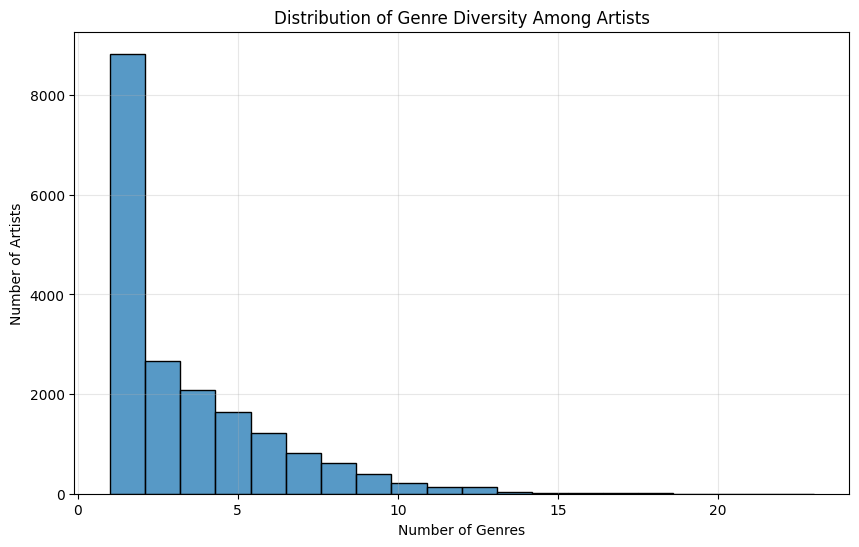

In [9]:
# Plot the distribution of genre diversity among artists

plt.figure(figsize=(10, 6))
sns.histplot(diversity_df['genre_count'], bins=20)
plt.title('Distribution of Genre Diversity Among Artists')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Artists')
plt.grid(True, alpha=0.3)
plt.show()

In [10]:
# Create a bipartite network
def create_bipartite_network(df, artist_col='artists', genre_col='parsed_genres'):
    B = nx.Graph()
    
    # Add artist nodes
    artists = df[artist_col].unique()
    B.add_nodes_from(artists, bipartite=0)
    
    # Add genre nodes
    genres = df[genre_col].unique()
    B.add_nodes_from(genres, bipartite=1)
    
    # Add edges
    edges = list(zip(df[artist_col], df[genre_col]))
    B.add_edges_from(edges)
    
    return B, artists, genres

B, artists_list, genres_list = create_bipartite_network(exploded_df)

print(f"\nBipartite Network Created:")
print(f"Number of nodes: {B.number_of_nodes()}")
print(f"Number of edges: {B.number_of_edges()}")
print(f"Number of artists: {len(artists_list)}")
print(f"Number of genres: {len(genres_list)}")




Bipartite Network Created:
Number of nodes: 21795
Number of edges: 65054
Number of artists: 18823
Number of genres: 2972



Creating subgraph for top 20 artists: ['Deerhunter', 'Autechre', 'Traffic', 'Cut Copy', 'Beat Happening', 'Unwound', 'Galaxie 500', 'Grouper', 'Joe Jackson', 'Oneohtrix Point Never', 'John Cale', 'Polvo', 'Pere Ubu', 'Badfinger', 'Guided By Voices', 'Sepultura', 'Big Star', 'The Byrds', 'Wire', 'Cabaret Voltaire']


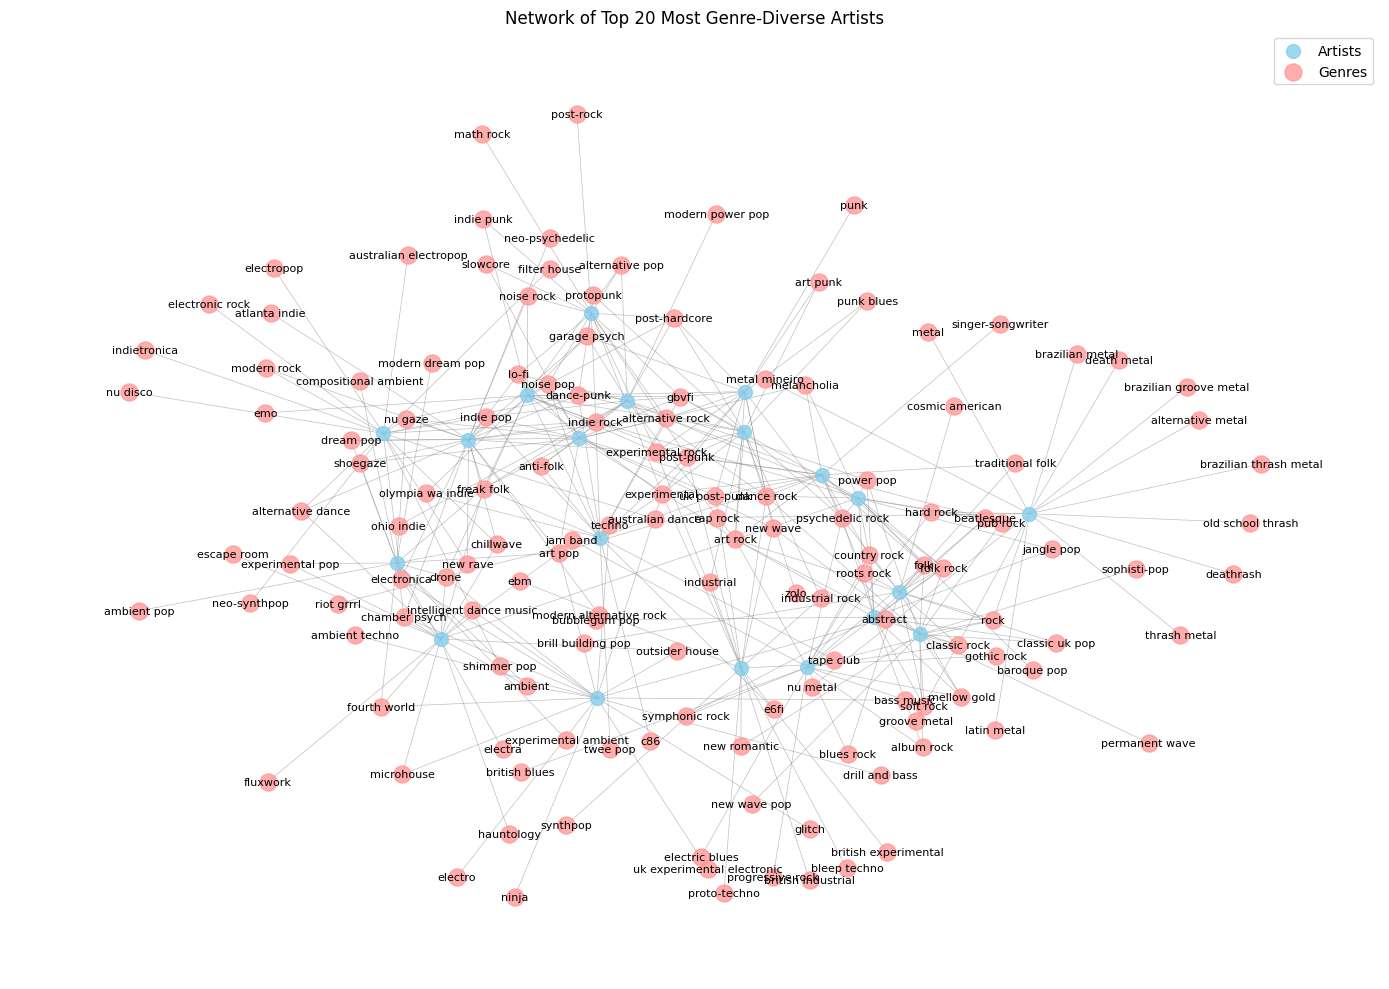

In [11]:
# Create subgraph for top 20 artists
def create_subgraph(B, top_artists, n):
    top_artists = diversity_df.head(n)['artists'].tolist()
    print(f"\nCreating subgraph for top {n} artists: {top_artists}")

    subset = nx.Graph()
    subset.add_nodes_from(top_artists, bipartite=0)

    connected_genres = set()
    for artist in top_artists:
        for genre in B.neighbors(artist):
            connected_genres.add(genre)
            subset.add_edge(artist, genre)
    
    # Add genre nodes to the subset
    subset.add_nodes_from(connected_genres, bipartite=1)

    # Plot the network
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(subset, k=0.3, iterations=50, seed=42)

    # Draw the nodes and edges
    nx.draw_networkx_nodes(subset, pos, 
                     nodelist=top_artists,
                     node_color='skyblue', 
                     node_size=100, 
                     alpha=0.8,
                     label='Artists')
    
    nx.draw_networkx_nodes(subset, pos, 
                     nodelist=connected_genres,
                     node_color='#ff9999', 
                     node_size=150, 
                     alpha=0.8,
                     label='Genres')
    
    nx.draw_networkx_edges(subset, pos, width=0.5, alpha=0.5, edge_color='gray')

    # Draw labels for artists and genres
    genre_labels = {node: node for node in connected_genres}
    nx.draw_networkx_labels(subset, pos, labels=genre_labels, font_size=8)

    plt.title("Network of Top 20 Most Genre-Diverse Artists")
    plt.legend()
    plt.axis('off')
    plt.tight_layout()

    return subset, plt

subset, plt = create_subgraph(B, artists_list, 20)
plt.show()


In [12]:
# Analyze genre popularity
genre_popularity = exploded_df.groupby('parsed_genres').count().reset_index().rename(columns={'artists': 'artist_count'}).sort_values(by='artist_count', ascending=False)
genre_popularity.head(20)

,parsed_genres,artist_count
2339,rock,611
2169,pop,593
746,dance pop,572
2292,rap,516
1291,hip hop,507
2185,pop rap,482
1818,modern rock,400
2187,pop rock,400
705,country rock,394
2832,urban contemporary,383


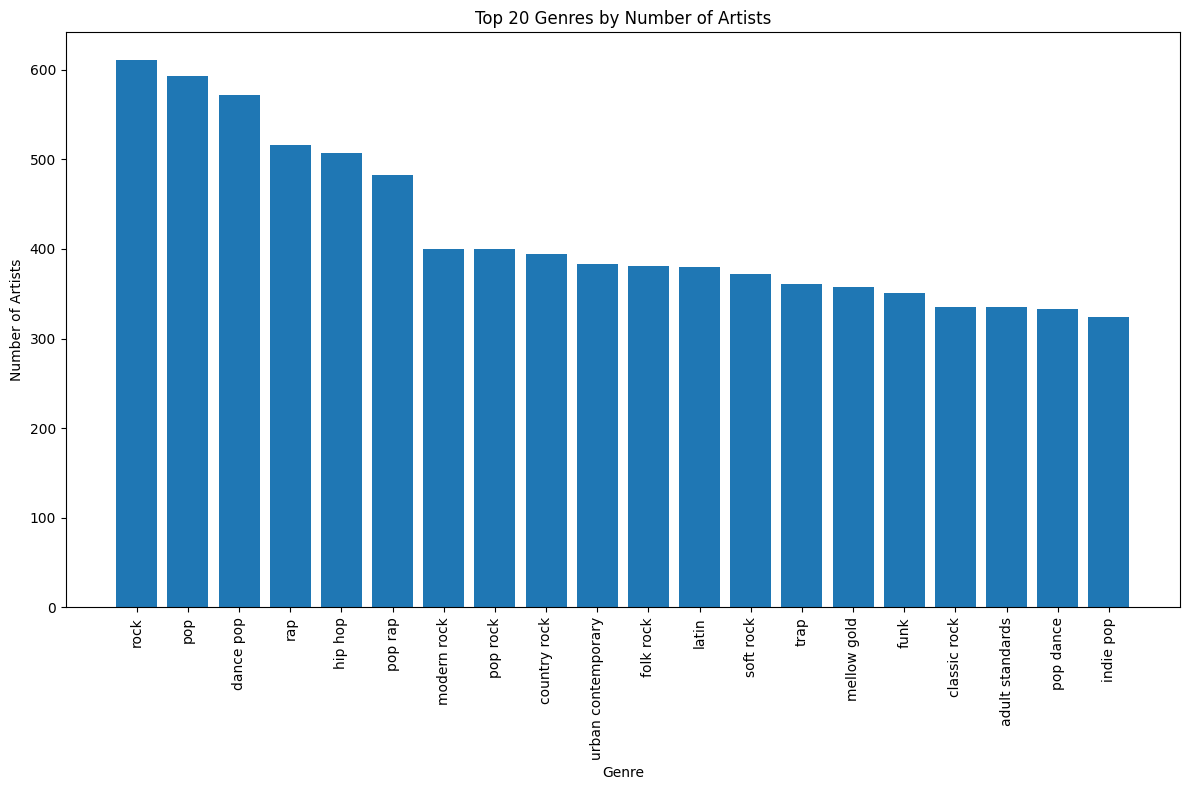

In [13]:
# Identify the popularity of genres
# Plot top genres
plt.figure(figsize=(12, 8))
top_n = 20
plt.bar(genre_popularity.head(top_n)['parsed_genres'], genre_popularity.head(top_n)['artist_count'])
plt.xticks(rotation=90)
plt.title(f'Top {top_n} Genres by Number of Artists')
plt.xlabel('Genre')
plt.ylabel('Number of Artists')
plt.tight_layout()
plt.show()

In [14]:
# Identify similar genres
genre_graph = nx.bipartite.projected_graph(B, genres_list)

for u, v in genre_graph.edges():
    # Count common neighbors (artists)
    common = list(nx.common_neighbors(B, u, v))
    genre_graph[u][v]['weight'] = len(common)

print(f"\nGenre Projection Network:")
print(f"Number of genres: {genre_graph.number_of_nodes()}")
print(f"Number of connections: {genre_graph.number_of_edges()}")


Genre Projection Network:
Number of genres: 2972
Number of connections: 26784


Network filtered to 150 most connected genres for visualization


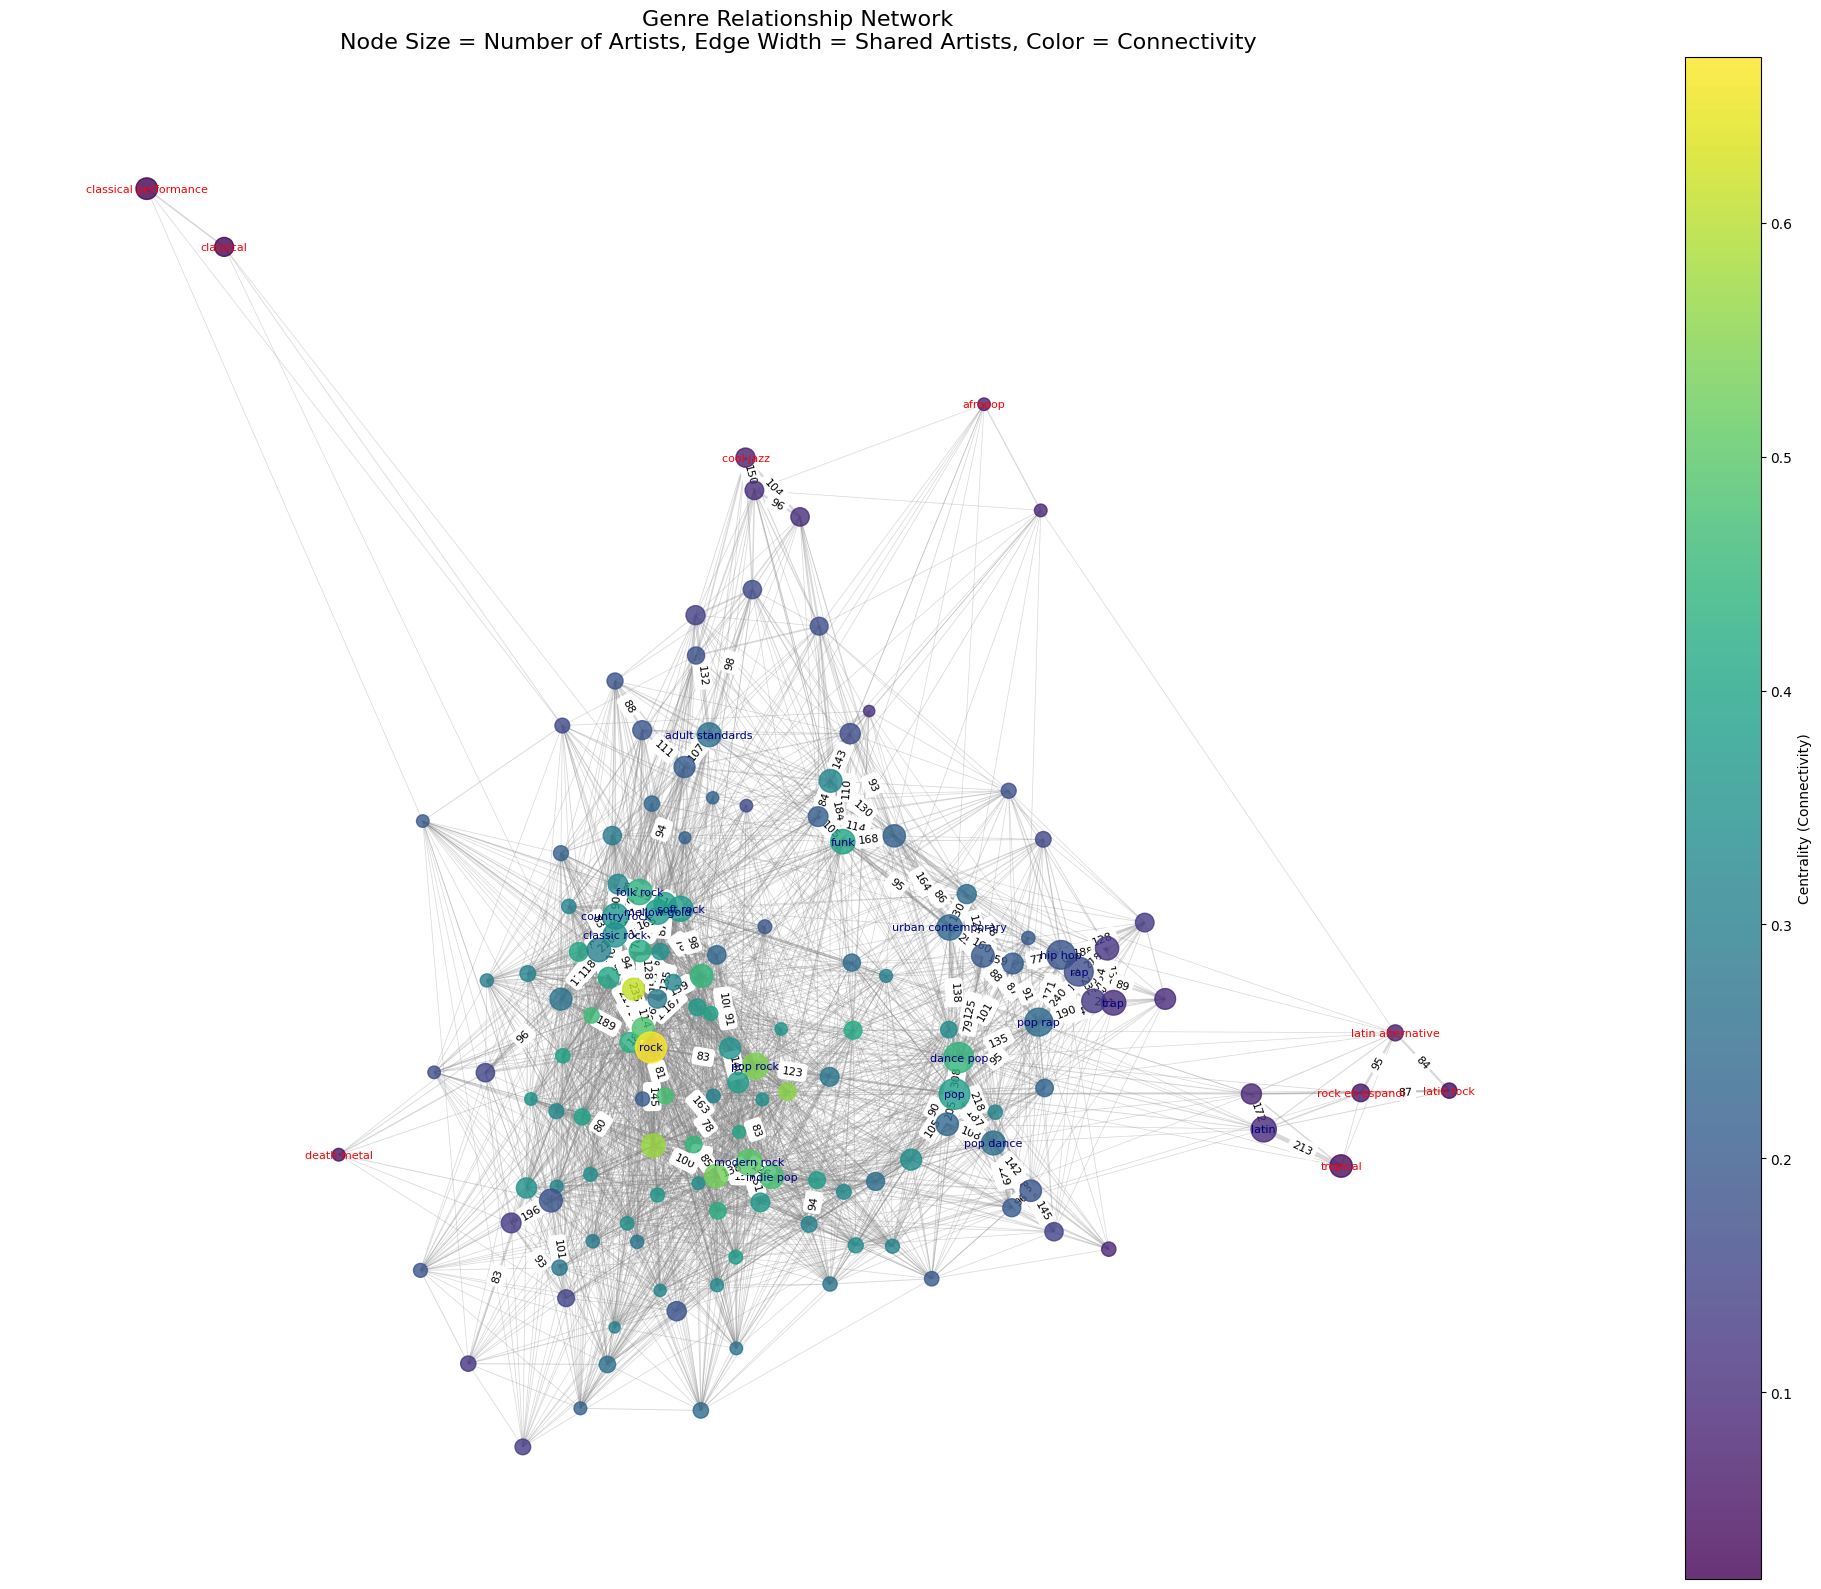

In [15]:
genre_artist_counts = {}
for genre in genres_list:
    genre_artist_counts[genre] = len(list(B.neighbors(genre)))


def plot_genre_network(graph, artist_counts, max_nodes=150):

    # Filter to the most connected ones
    if len(graph) > max_nodes:
        degrees = dict(graph.degree())

        top_nodes = sorted(degrees.items(), key=lambda x: x[1], reverse=True)[:max_nodes]
        top_node_names = [n[0] for n in top_nodes]

        graph = graph.subgraph(top_node_names)
        print(f"Network filtered to {len(graph)} most connected genres for visualization")
    
    plt.figure(figsize=(20, 16))
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=42)
    
    # Get edge weights based on number of shared artists
    edge_weights = [graph[u][v]['weight'] for u, v in graph.edges()]
    max_edge_weight = max(edge_weights) if edge_weights else 1
    
    # Normalize edge weights
    norm_edge_weights = [0.5 + (w / max_edge_weight) * 4.5 for w in edge_weights]
    
    # Node size based on normalized number of artists
    node_sizes = []
    max_artist_count = max(artist_counts.values()) if artist_counts else 1
    for node in graph.nodes():
        count = artist_counts.get(node, 0)
        size = 50 + (count / max_artist_count) * 450
        node_sizes.append(size)
    
    # Colors based on degree centrality (connectivity)
    centrality = nx.degree_centrality(graph)
    node_colors = [centrality[n] for n in graph.nodes()]

    # Create a dictionary for low centrality labels
    low_centrality_labels = {node: node for node in graph.nodes() 
                        if centrality[node] <= np.percentile(list(centrality.values()), 5)}
    
    nx.draw_networkx_edges(graph, pos, 
                         width=norm_edge_weights,
                         alpha=0.3, 
                         edge_color='gray')
    
    nodes = nx.draw_networkx_nodes(graph, pos,
                                 node_size=node_sizes,
                                 node_color=node_colors, 
                                 cmap=plt.cm.viridis,
                                 alpha=0.8)
    
    plt.colorbar(nodes, label='Centrality (Connectivity)')
    
    # Add labels for the top 20 genres by artist count
    top_genres = sorted(artist_counts.items(), key=lambda x: x[1], reverse=True)[:20]
    top_genre_names = [g[0] for g in top_genres]
    label_dict = {node: node for node in graph.nodes() if node in top_genre_names}
    nx.draw_networkx_labels(graph, pos, labels=label_dict, font_size=8, font_color='navy')
    
    # Add edge weight labels for edges with top 5% high weights
    edge_weight_dict = {(u, v): f"{graph[u][v]['weight']}" 
                     for u, v in graph.edges() 
                     if graph[u][v]['weight'] > np.percentile(edge_weights, 95)}
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=edge_weight_dict, font_size=8)
    
    # Highlight low centrality nodes
    nx.draw_networkx_labels(graph, pos, labels=low_centrality_labels, 
                      font_size=8, font_color='red')
    
    plt.title('Genre Relationship Network\nNode Size = Number of Artists, Edge Width = Shared Artists, Color = Connectivity', 
            fontsize=16)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
    
    return graph

# Plot the genre network
filtered_genre_graph = plot_genre_network(genre_graph, genre_artist_counts)

In [16]:
# Detect communities
communities = list(community.greedy_modularity_communities(genre_graph))

# Largest communities
print("\nLargest Genre Communities:")
for i, comm in enumerate(sorted(communities, key=len, reverse=True)[:5]):
    print(f"Community {i+1}: {len(comm)} genres")
    comm_list = list(comm)
    print(f"Sample genres: {', '.join(comm_list[:5])}")
    print()


Largest Genre Communities:
Community 1: 787 genres
Sample genres: manchester indie, singer-songwriter, deep psychobilly, canadian americana, dream pop

Community 2: 712 genres
Sample genres: south african hip hop, groove room, pop edm, dark techno, classical saxophone

Community 3: 481 genres
Sample genres: classical accordion, accordeon, folklore venezolano, gregorian chant, quatuor a cordes

Community 4: 351 genres
Sample genres: japanese post-hardcore, italian power metal, virginia punk, progressive jazz fusion, north carolina metal

Community 5: 185 genres
Sample genres: tagalog rap, desi hip hop, movie tunes, classical harp, classic swedish pop



In [17]:
# Find genres that frequently appear together
def get_top_cooccurring_pairs(df, top_n, artist_col='artists', genre_col='parsed_genres'):
    # Count for each artist how many times each genre pair appears
    pairs = []
    
    artist_genres = df.groupby(artist_col)[genre_col].apply(list)
    
    # Find all genre pairs
    for artist, genres in artist_genres.items():

        genres = list(set(genres))
        
        if len(genres) < 2:
            continue
            
        for i in range(len(genres)):
            for j in range(i+1, len(genres)):
                pairs.append((genres[i], genres[j]))

    pair_counts = Counter(pairs)
    
    return pair_counts.most_common(top_n)

top_n = 10
top_pairs = get_top_cooccurring_pairs(exploded_df, top_n)

print(f"\nTop {top_n} co-occurring genre pairs:")
for (genre1, genre2), count in top_pairs:
    print(f"{genre1} & {genre2}: {count} artists")


Top 10 co-occurring genre pairs:
hip hop & rap: 300 artists
pop & dance pop: 245 artists
pop rap & rap: 238 artists
southern hip hop & rap: 230 artists
southern hip hop & trap: 221 artists
dance pop & pop dance: 217 artists
rap & gangster rap: 214 artists
rap & trap: 213 artists
soft rock & mellow gold: 211 artists
classic rock & rock: 208 artists


In [18]:
print("\nSUMMARY:")
print(f"Total artists: {len(artists_list)}")
print(f"Total genres: {len(genres_list)}")
print(f"Average genres per artist: {diversity_df['genre_count'].mean():.2f}")
print(f"Maximum genres for a single artist: {diversity_df['genre_count'].max()}")
print(f"Number of genre communities detected: {len(communities)}")


SUMMARY:
Total artists: 18823
Total genres: 2972
Average genres per artist: 3.46
Maximum genres for a single artist: 23
Number of genre communities detected: 231
